In [1]:
import torch
import matplotlib.pylab as plt
import matplotlib.patches as patches
import numpy as np
from mydataset import MyDataset

In [2]:
data_dir = '/data/stardust/easy_ViTPose/NTU_DATASET_KP/'
dataset = MyDataset(data_dir=data_dir)

In [3]:
len(dataset)

69624

In [11]:
dataset.action_dir_dic.keys()

dict_keys(['A029', 'A030', 'A092', 'A047', 'A082', 'A077', 'A032', 'A024', 'A003', 'A034', 'A079', 'A073', 'A033', 'A018', 'A044', 'A031', 'A068', 'A087', 'A041', 'A005', 'A064', 'A094', 'A046', 'A011', 'A088', 'A090', 'A075', 'A010', 'A037', 'A089', 'A017', 'A016', 'A105', 'A013', 'A084', 'A019', 'A042', 'A006', 'A021', 'A062', 'A061', 'A069', 'A066', 'A002', 'A045', 'A074', 'A083', 'A076', 'A071', 'A103', 'A078', 'A093', 'A025', 'A028', 'A065', 'A091', 'A072', 'A001', 'A063', 'A043', 'A004', 'A049', 'A085', 'A081', 'A012', 'A020', 'A086', 'A067', 'A036', 'A038', 'A014', 'A070', 'A015'])

In [4]:
dataset.all_data_dir_list[0], dataset.all_data_dir_list[90], dataset.all_data_dir_list[10201]

('/data/stardust/easy_ViTPose/NTU_DATASET_KP/A029_KP/S013C001P025R002A029_rgb_kp.json',
 '/data/stardust/easy_ViTPose/NTU_DATASET_KP/A029_KP/S015C002P017R002A029_rgb_kp.json',
 '/data/stardust/easy_ViTPose/NTU_DATASET_KP/A079_KP/S020C003P043R002A079_rgb_kp.json')

In [5]:
data_item = dataset[10201]
data_item.keys()

dict_keys(['anchor_c0', 'anchor_aug_c0', 'semi_positives_c0', 'anchor_c1', 'anchor_aug_c1', 'semi_positives_c1', 'anchor_c2', 'anchor_aug_c2', 'semi_positives_c2', 'anchor_c3', 'anchor_aug_c3', 'semi_positives_c3', 'anchor_c4', 'anchor_aug_c4', 'semi_positives_c4'])

In [6]:
for i in range(5):
    print(f"anchor_c{i}", data_item[f"anchor_c{i}"].shape)
    print(f"anchor_aug_c{i}", data_item[f"anchor_aug_c{i}"].shape)
    print(f"semi_positives_c{i}", data_item[f"semi_positives_c{i}"].shape)

anchor_c0 torch.Size([1, 23, 12])
anchor_aug_c0 torch.Size([1, 20, 12])
semi_positives_c0 torch.Size([10, 23, 12])
anchor_c1 torch.Size([1, 23, 4])
anchor_aug_c1 torch.Size([1, 20, 4])
semi_positives_c1 torch.Size([10, 23, 4])
anchor_c2 torch.Size([1, 23, 4])
anchor_aug_c2 torch.Size([1, 20, 4])
semi_positives_c2 torch.Size([10, 23, 4])
anchor_c3 torch.Size([1, 23, 4])
anchor_aug_c3 torch.Size([1, 20, 4])
semi_positives_c3 torch.Size([10, 23, 4])
anchor_c4 torch.Size([1, 23, 4])
anchor_aug_c4 torch.Size([1, 20, 4])
semi_positives_c4 torch.Size([10, 23, 4])


In [7]:
def visualize_keypoint(c0, c1, c2, c3, c4):
    _, K, D = c0.shape

    neck_keypoint = np.array([5.0, 5.0]).reshape(1, 1, 2)
    neck_keypoint = np.tile(neck_keypoint, [1, K, 1])
    
    nose = c0[:, :, :2] + neck_keypoint
    left_shoulder = c0[:, :, 2:4] + neck_keypoint
    right_shoulder = c0[:, :, 4:6] + neck_keypoint
    mid_hip = c0[:, :, 6:8] + neck_keypoint
    left_hip = c0[:, :, 8:10] + mid_hip
    right_hip = c0[:, :, 10:12] + mid_hip

    left_elbow = c1[:, :, 0:2]  + left_shoulder
    left_wrist = c1[:, :, 2:4] + left_elbow

    right_elbow = c2[:, :, 0:2]  + right_shoulder
    right_wrist = c2[:, :, 2:4] + right_elbow

    left_knee = c3[:, :, 0:2] + left_hip
    left_ankle = c3[:, :, 2:4] + left_knee

    right_knee = c4[:, :, 0:2] + right_hip
    right_ankle = c4[:, :, 2:4] + right_knee

    restored_keypoints = np.stack([
        nose,
        neck_keypoint,
        left_shoulder,
        right_ankle,
        mid_hip,
        left_hip,
        right_hip,
        left_elbow,
        left_wrist,
        right_elbow,
        right_wrist,
        left_knee,
        left_ankle,
        right_knee,
        right_ankle
    ], axis=-2)

    print(restored_keypoints.shape)
    print(restored_keypoints.max(), restored_keypoints.min())

    for frame_index in range(restored_keypoints.shape[1]):
        canvas = np.zeros((10, 10))

        fig, ax = plt.subplots(1, 1)
        ax.imshow(canvas)

        for keypoint_index in range(restored_keypoints.shape[2]):
            ax.add_patch(patches.Circle(
                [restored_keypoints[0, frame_index, keypoint_index][1], restored_keypoints[0, frame_index, keypoint_index][0]],
                radius=0.1,
                fill=True,
                color="red"
            ))

        plt.show()

In [8]:
def test(index):
    data_item = dataset[index]
    visualize_keypoint(
        *[data_item[f"anchor_c{i}"] for i in range(5)]
    )

(1, 21, 15, 2)
8.421564728021622 2.77563613653183


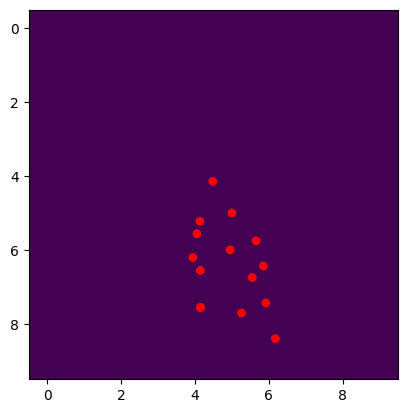

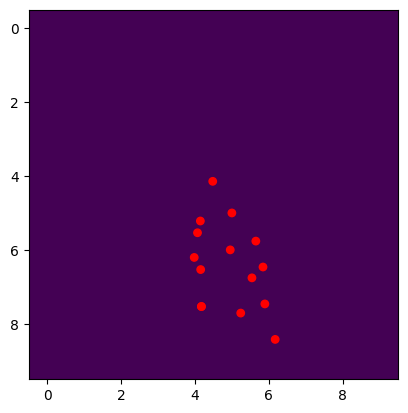

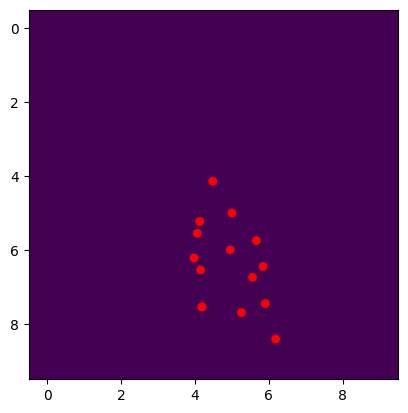

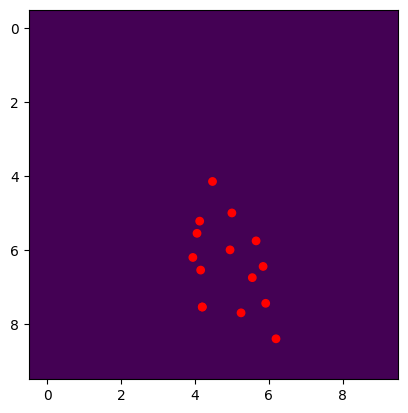

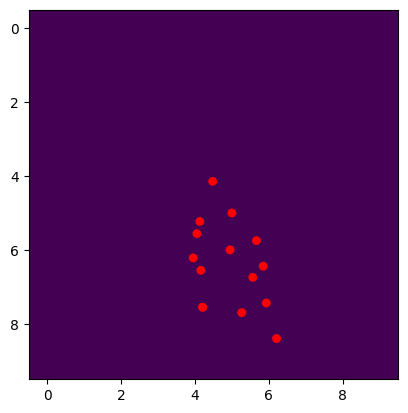

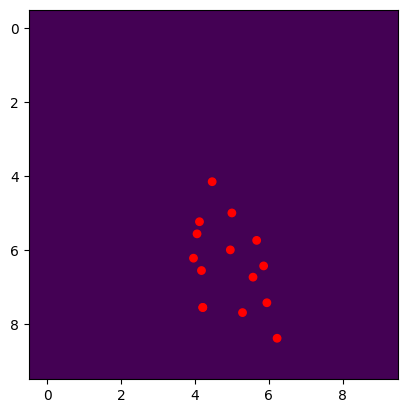

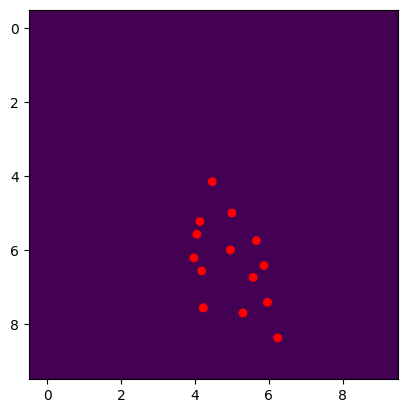

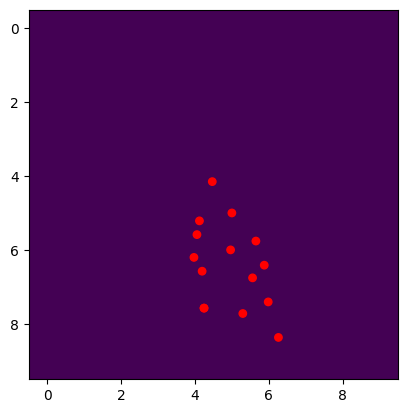

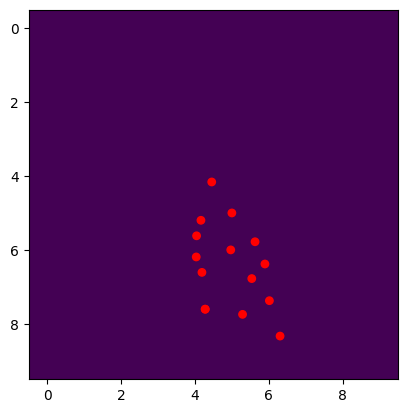

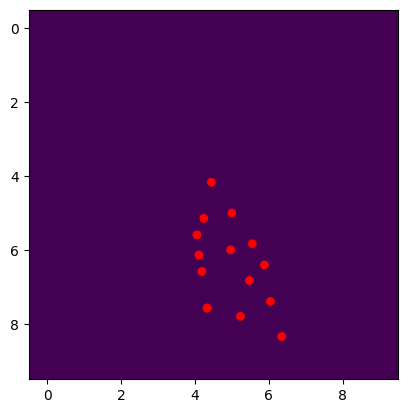

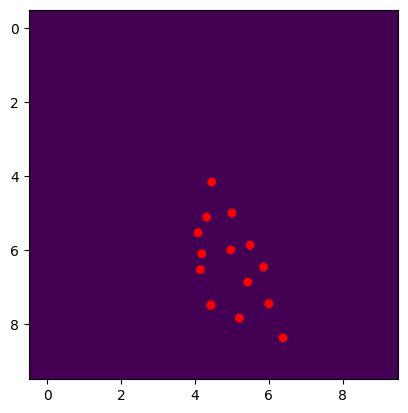

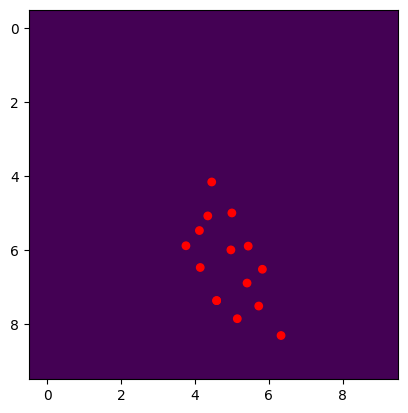

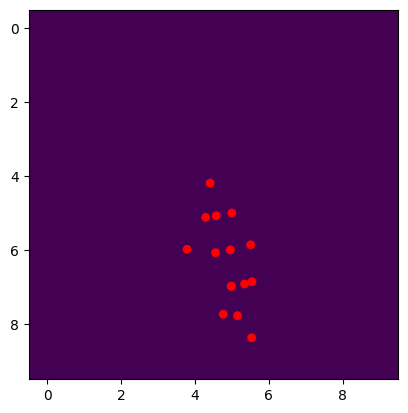

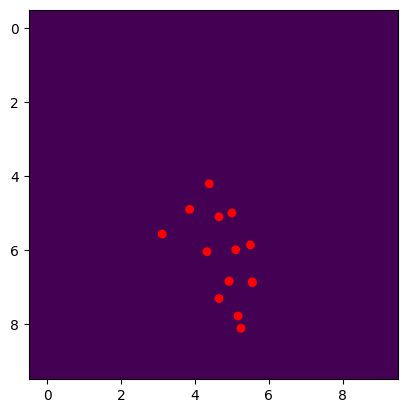

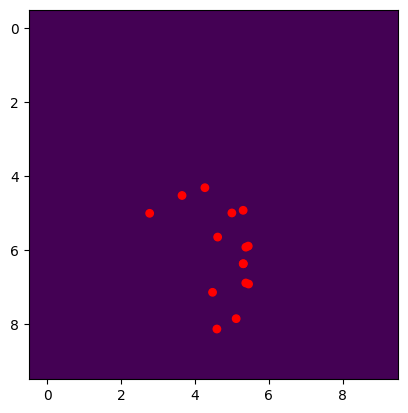

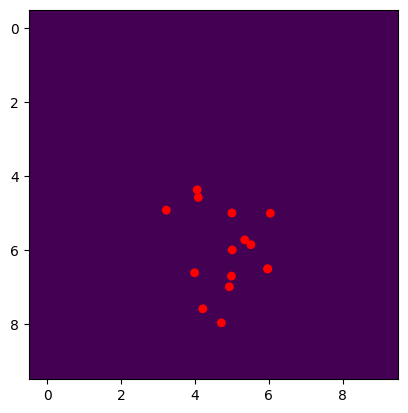

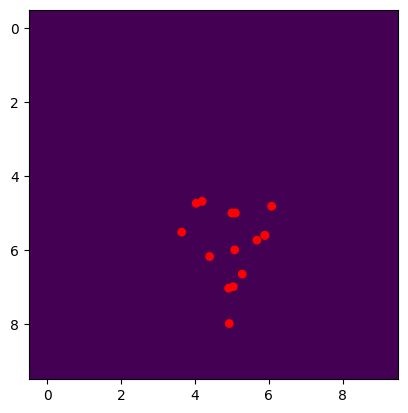

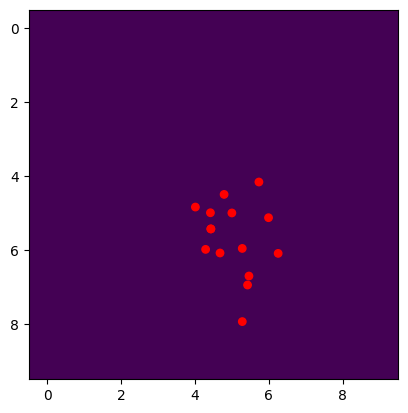

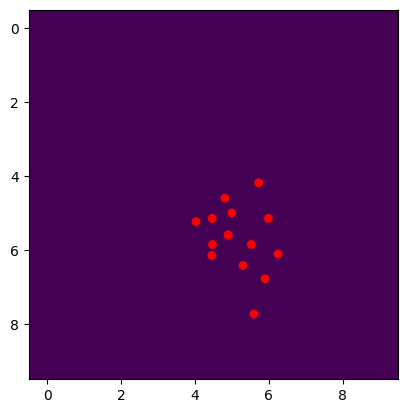

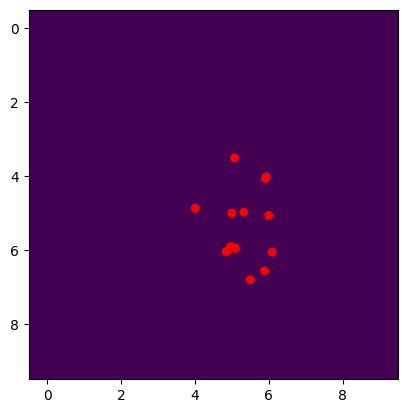

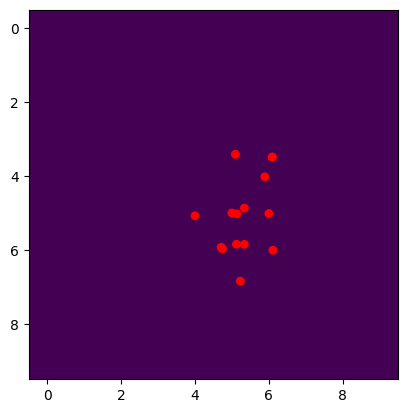

In [9]:
test(56704)